# Extract green and red lines that we haven't got yet

* We have a small window between 5400 and 6100 Å, where we haven't extracted any lines yet.  I think it only has [N II] and He I, but there might also be a weak He II line at 5400 Å. 

* We also want to get the [Ar III] and [O II] lines from the 7000 to 8000 Å range. And there are the infrared lines for 8000+, but maybe they can wait.

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube
import regions
import sys
sys.path.append("../lib")
import moments
import extract

sns.set_context("talk")
sns.set_color_codes()

In [2]:
moments.FIGPATH = Path("../figs")
moments.SAVEPATH = Path("../data")

Load up both cubes, as per previous notebooks. 

In [3]:
datapath = Path("/Users/will/Work/Muse-Hii-Data/SMC-NGC-346/")
file1 = "ADP.2017-10-16T11_04_19.247.fits"
file2 = "ADP.2016-10-12T05_43_23.882.fits"
cube1 = Cube(str(datapath / file1))
cube2 = Cube(str(datapath / file2))

Get all the regions from previous notebooks:

In [12]:
# Position of mYSO
x, y = 116, 147
# position of B0 star SSN 43
xb, yb = 95, 163
# position of B0 star SSN 40
xbb, ybb = 121, 133
m = 3


# These are defined with respect to mcube
mboxes = {
#    "sw filament": regions.BoundingBox(
#        iymin=30, iymax=50, ixmin=300, ixmax=330,
#    ),
    "bow shock": regions.BoundingBox(
        iymin=165, iymax=205, ixmin=240, ixmax=290,
    ),
    "w filament": regions.BoundingBox(
        iymin=100, iymax=130, ixmin=25, ixmax=55,
    ),
    "c filament": regions.BoundingBox(
        iymin=195, iymax=210, ixmin=155, ixmax=195,
    ),
    "blue": regions.BoundingBox(
        iymin=75, iymax=140, ixmin=15, ixmax=40
    ),
    "red": regions.BoundingBox(
        iymin=200, iymax=250, ixmin=210, ixmax=300
    ),
    "magenta": regions.BoundingBox(
        iymin=10, iymax=50, ixmin=100, ixmax=150
    ),
    "green": regions.BoundingBox(
        iymin=10, iymax=100, ixmin=200, ixmax=300
    ),
    "cyan": regions.BoundingBox(
        iymin=170, iymax=210, ixmin=90, ixmax=120
    ),
}

# These are defined with respect to the sharp cube
sboxes = {
    "SSN 152+168": regions.BoundingBox(
        iymin=y-m, iymax=y+m, ixmin=x-m, ixmax=x+m,
    ),
    "SSN 43": regions.BoundingBox(
        iymin=yb-m, iymax=yb+m, ixmin=xb-m, ixmax=xb+m,
    ),
    "SSN 40": regions.BoundingBox(
        iymin=ybb-m, iymax=ybb+m, ixmin=xbb-m, ixmax=xbb+m,
    ),
}



## Start with the green range

In [4]:
wavmin, wavmax = 5300, 6100
cube = cube2.select_lambda(wavmin, wavmax)
mcube = cube1.select_lambda(wavmin, wavmax)

In [45]:
wavranges = [
    (5305, 5315), (5350, 5360), (5390, 5400),
    (5450, 5500), (5560, 5570),
    (5600, 5740), (5765, 5780),
    (5820, 5835), (5850, 5870),
    (5905, 5915), (6000, 6030), (6050, 6100),
]

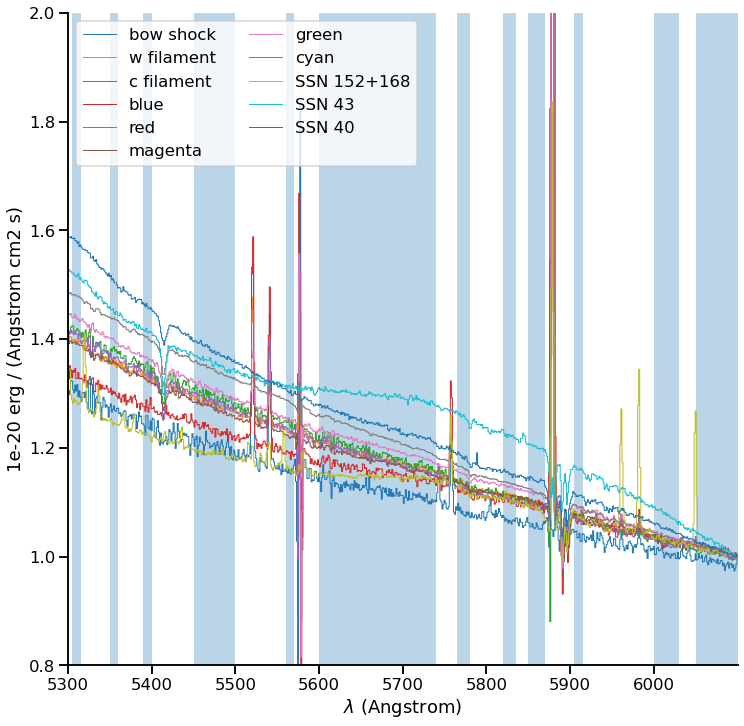

In [46]:
fig, ax = plt.subplots(figsize=(12, 12))

for label, box in mboxes.items():
    yslice, xslice = box.slices
    spec = mcube[:, yslice, xslice].mean(axis=(1, 2))
    (spec / spec.data[-1]).plot(label=label)

for label, box in sboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    (spec / spec.data[-1]).plot(label=label)
     
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.legend(ncol=2)
ax.set(
    ylim=[0.8, 2.0],
)
sns.despine();

In [47]:
yslice, xslice = sboxes["SSN 152+168"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube, wav_ranges=wavranges, deg=6, median=False,
)

extract.fit_continuum: row 0


[(3500.0, 5000.0)]

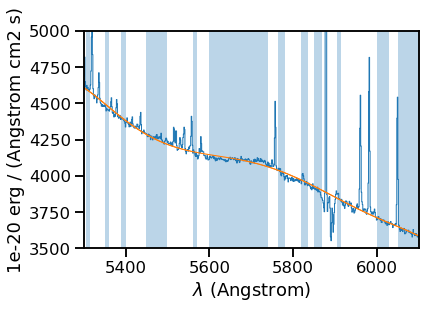

In [48]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[3500, 5000])

In [51]:
yslice, xslice = mboxes["bow shock"].slices
subcube = mcube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube, wav_ranges=wavranges, deg=6, median=False,
)

extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30


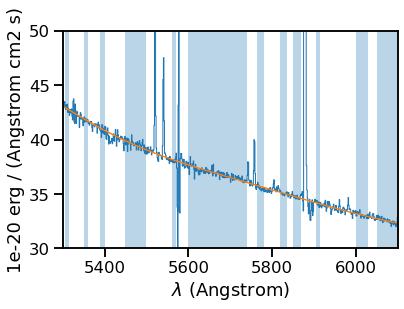

In [54]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[30, 50]);

In [55]:
mcontcube = extract.fit_continuum(
    mcube, wav_ranges=wavranges, deg=6, median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:345: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:346: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:414: RuntimeWarning: invalid value encountered in add
  return off + scl*x
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


In [56]:
contcube = extract.fit_continuum(
    cube, wav_ranges=wavranges, deg=6, median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:345: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:346: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:414: RuntimeWarning: invalid value encountered in add
  return off + scl*x


extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


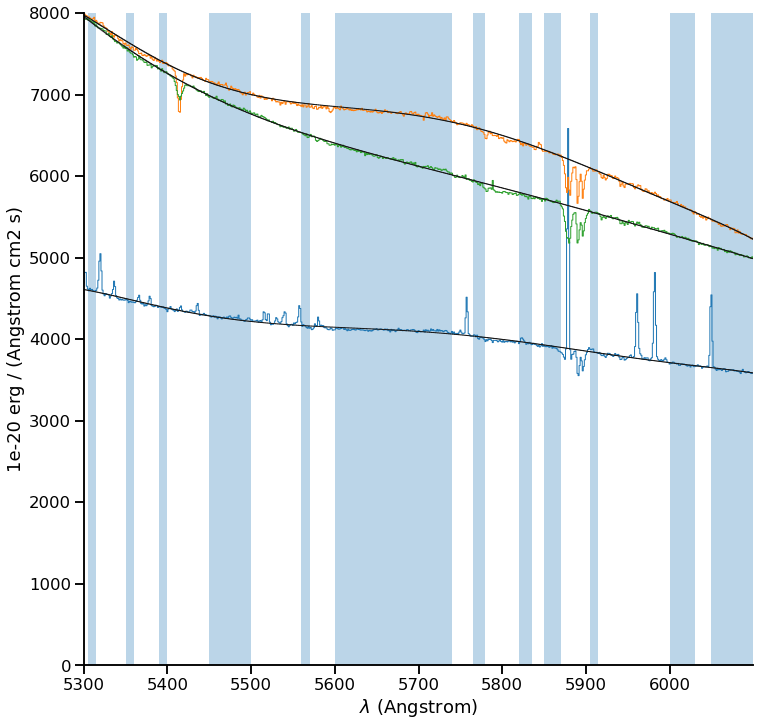

In [58]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in sboxes.values():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")
    
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, 8000],
)
sns.despine();

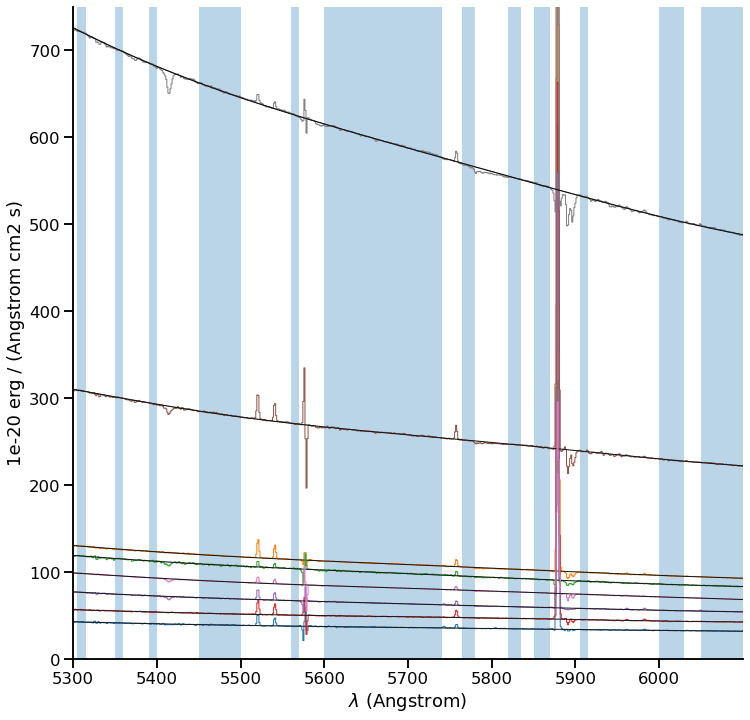

In [60]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in mboxes.values():
    yslice, xslice = box.slices
    spec = mcube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = mcontcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")
    
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, 750],
)
sns.despine();

In [61]:
prefix = f"../big-data/ngc346-sharp-{wavmin:d}-{wavmax:d}-cube"
csubcube = (cube - contcube)
cdivcube = (cube / contcube)
csubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
    )
cdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
    )
contcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
    )

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


In [62]:
prefix = f"../big-data/ngc346-{wavmin:d}-{wavmax:d}-cube"
mcsubcube = (mcube - mcontcube)
mcdivcube = (mcube / mcontcube)
mcsubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
    )
mcdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
    )
mcontcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
    )

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


### Extract He I 5875 line

In [63]:
mom5875 = moments.find_moments(
    mcsubcube.select_lambda(5874, 5885)
)

../lib/moments.py:41: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


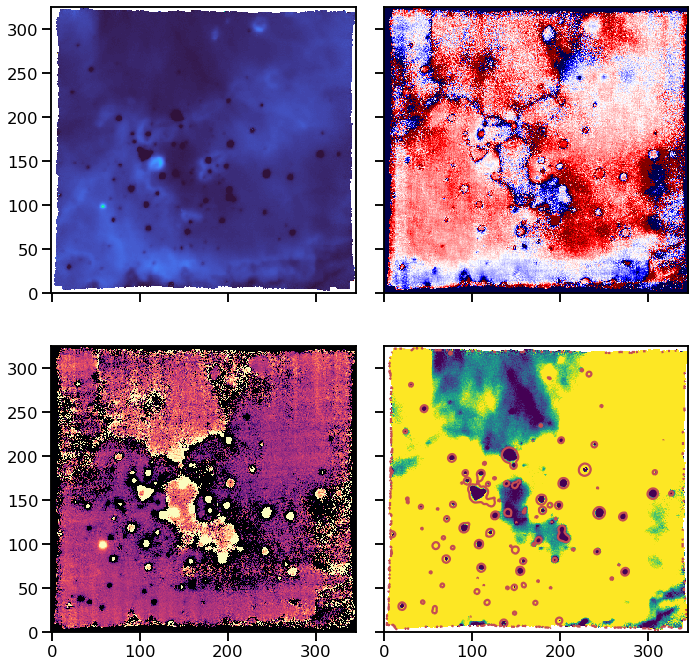

In [65]:
fig, axes = plt.subplots(
    2, 2, 
    figsize=(10, 10),
    sharex=True, sharey=True,
)

imap = mom5875[0].copy()
vmap = 3e5*(mom5875[1] / 5875.62 - 1.0)
smap = 3e5*(mom5875[2] / 5875.62)

#m = imap.data > 10.

#vmap.mask = vmap.mask | (~m)
#smap.mask = smap.mask | (~m)

imap.rebin(1).plot(
    vmin=-1e3, vmax=3e4, 
    cmap="turbo", 
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=100, vmax=220, 
    cmap="seismic", 
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=0, vmax=120, 
    cmap="magma", 
    ax=axes[1, 0],
)

imap.rebin(1).plot(
    vmin=-500, vmax=0, 
    cmap="viridis", 
    ax=axes[1, 1],
)
bg_5875 = mcontcube.select_lambda(5874, 5885).mean(axis=0)
axes[1, 1].contour(
    bg_5875.data,
    levels=[1000],
    colors="r",
)

fig.tight_layout();

Fix sky as with Hβ

In [66]:
msky = imap.mask.copy()
msky[:, :] = False
msky[8, 103:106] = True
np.where(msky)

(array([8, 8, 8]), array([103, 104, 105]))

Make a wider window

In [67]:
core_5875 = mcsubcube.select_lambda(5864, 5895)

In [68]:
sky_5875 = core_5875.copy() 
sky_5875.mask = sky_5875.mask | ~msky[None, : :]

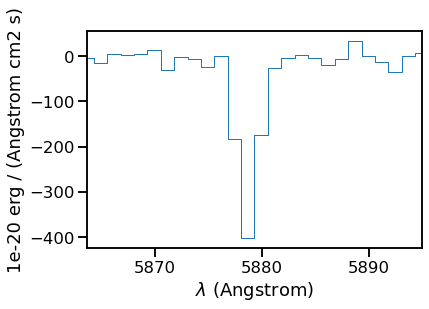

In [69]:
sky_5875.mean(axis=(1, 2)).plot()

In [70]:
corr_5875 = core_5875 - sky_5875.mean(axis=(1, 2))

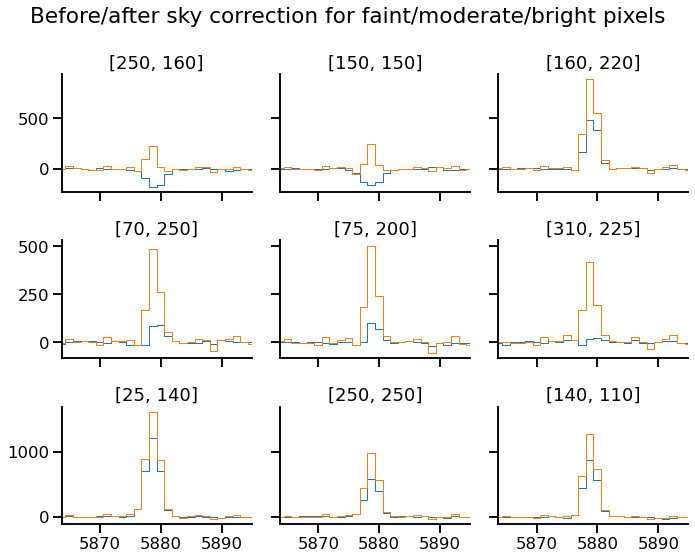

In [71]:
testpixels = [
    [250, 160], [150, 150], [160, 220],
    [70, 250], [75, 200], [310, 225],
    [25, 140], [250, 250], [140, 110], #[180, 290],
]
fig, axes = plt.subplots(
    3, 3, 
    figsize=(10, 8), 
    sharex=True,
    sharey="row",
)
for (j, i), ax in zip(testpixels, axes.flat):
    core_5875[:, j, i].plot(ax=ax)
    corr_5875[:, j, i].plot(ax=ax) 
    ax.set(xlabel="", ylabel="")
    ax.set_title(f"[{j}, {i}]")
fig.suptitle(
    "Before/after sky correction for faint/moderate/bright pixels"
)
sns.despine()
fig.tight_layout();

In [72]:
mom5875c = moments.find_moments(corr_5875.select_lambda(5874, 5885))

../lib/moments.py:41: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


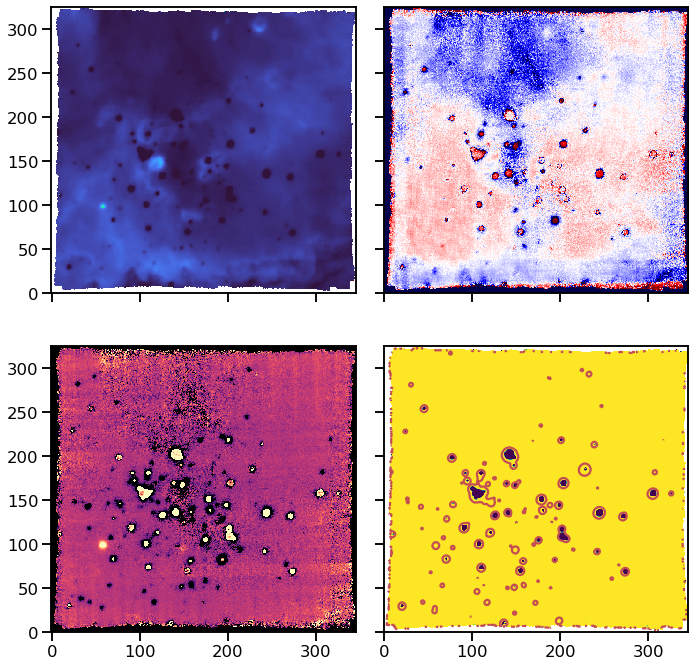

In [73]:
fig, axes = plt.subplots(
    2, 2, 
    figsize=(10, 10),
    sharex=True, sharey=True,
)

imap = mom5875c[0].copy()
vmap = 3e5*(mom5875c[1] / 5875.62 - 1.0)
smap = 3e5*(mom5875c[2] / 5875.62)


#m = imap.data > 10.

#vmap.mask = vmap.mask | (~m)
#smap.mask = smap.mask | (~m)

imap.rebin(1).plot(
    vmin=0, vmax=3e4, 
    cmap="turbo", 
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=100, vmax=220, 
    cmap="seismic", 
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=0, vmax=120, 
    cmap="magma", 
    ax=axes[1, 0],
)

imap.rebin(1).plot(
    vmin=-500, vmax=0, 
    cmap="viridis", 
    ax=axes[1, 1],
)
axes[1, 1].contour(
    bg_5875.data,
    levels=[1000],
    colors="r",
)

fig.tight_layout();

In [74]:
mom_pars = dict(
    restwav=5875.62,
    irange=[1.0e2, 3.5e4],
    vrange=[135, 195],
    srange=[30, 150],    
)

In [75]:
moments.save_moments_to_fits(
    mom5875c,
    label="5875",
    flabel="ngc346-hei",
    **mom_pars,
)

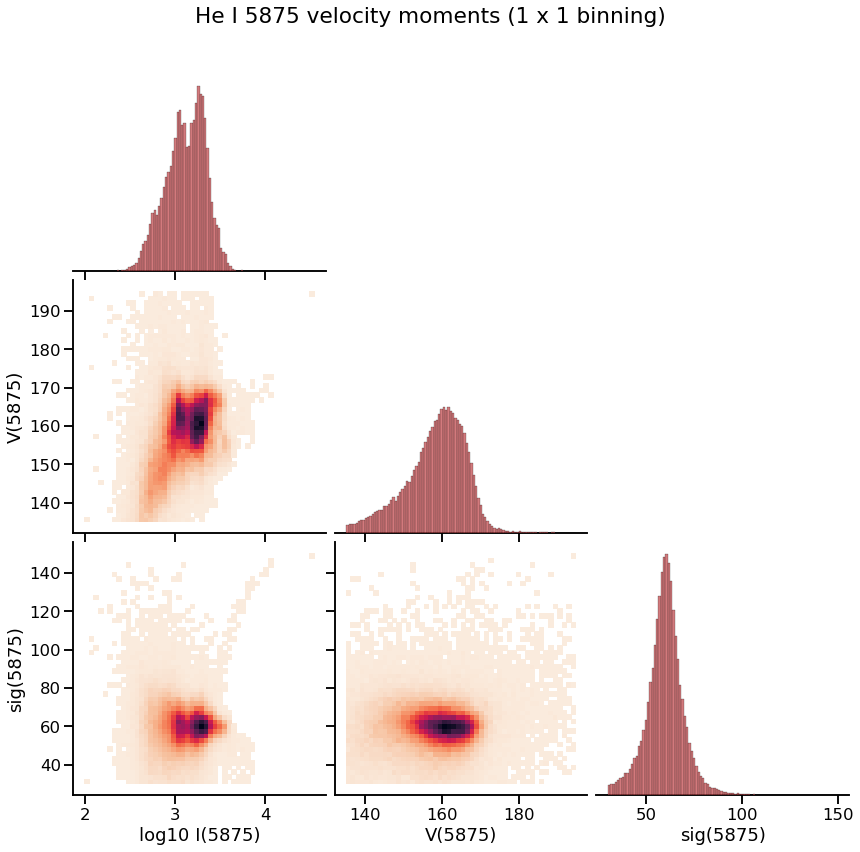

In [76]:
plot_pars=dict(
    ilabel="He I",
    label="5875",
    flabel="ngc346-hei",
    **mom_pars,
)
g = moments.moments_corner_plot(
    mom5875c, rebin=1, **plot_pars,
)

### Extract [Cl III] lines

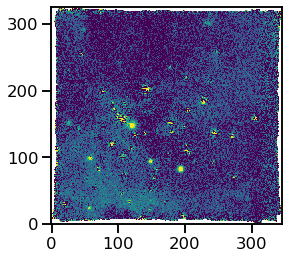

In [85]:
mcsubcube.select_lambda(5500, 5550).sum(axis=0).plot(vmin=0, vmax=1000, scale="sqrt")

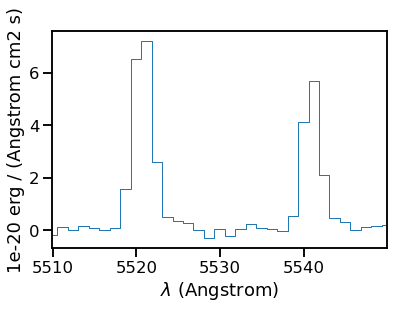

In [88]:
mcsubcube.select_lambda(5510, 5550).median(axis=(1, 2)).plot()

In [89]:
mom5518 = moments.find_moments(
    mcsubcube.select_lambda(5518, 5525)
)
mom5538 = moments.find_moments(
    mcsubcube.select_lambda(5538, 5545)
)

../lib/moments.py:41: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)
../lib/moments.py:41: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


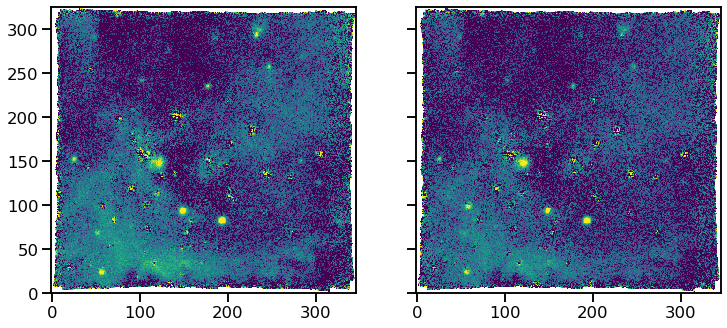

In [94]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
mom5518[0].plot(ax=axes[0], vmin=0, vmax=300, scale="sqrt")
mom5538[0].plot(ax=axes[1], vmin=0, vmax=300, scale="sqrt")

In [95]:
moments.save_moments_to_fits(
    mom5518,
    label="5518",
    flabel="ngc346-cliii",
    restwav=5517.71,
)
moments.save_moments_to_fits(
    mom5538,
    label="5538",
    flabel="ngc346-cliii",
    restwav=5537.88,
)

### Extract [N II] line

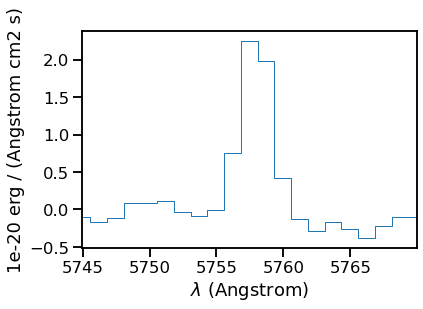

In [99]:
mcsubcube.select_lambda(5745, 5770).median(axis=(1, 2)).plot()

In [100]:
mom5755 = moments.find_moments(
    mcsubcube.select_lambda(5755, 5762)
)

../lib/moments.py:41: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


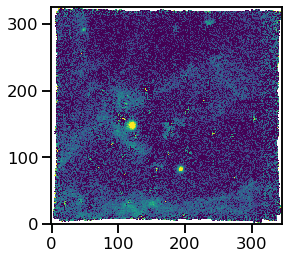

In [102]:
mom5755[0].plot(vmin=0.0, vmax=300.0, scale="sqrt")

In [103]:
moments.save_moments_to_fits(
    mom5755,
    label="5755",
    flabel="ngc346-nii",
    restwav=5755.08,
)

## Second, the red range

In [112]:
wavmin, wavmax = 7000, 7800
cube = cube2.select_lambda(wavmin, wavmax)
mcube = cube1.select_lambda(wavmin, wavmax)

In [113]:
mavspec = mcube.mean(axis=(1, 2))
avspec = cube.mean(axis=(1, 2))

In [143]:
wavranges = [
    (7010, 7030), (7080, 7090), (7115, 7125),
    (7200, 7220),
    (7342, 7355),
    (7400, 7415), (7490, 7500),
    (7540, 7570),
    (7680, 7700), (7760, 7775),
]

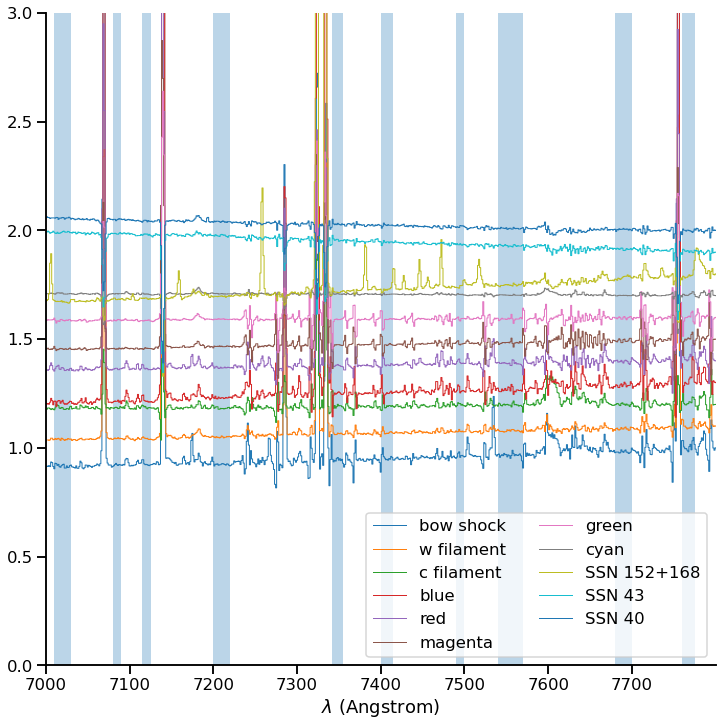

In [144]:
fig, ax = plt.subplots(figsize=(12, 12))

offset = 0
for label, box in mboxes.items():
    yslice, xslice = box.slices
    spec = mcube[:, yslice, xslice].mean(axis=(1, 2))
    spec = spec / mavspec
    (offset + spec / spec.data[-1]).plot(label=label)
    offset += 0.1

for label, box in sboxes.items():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    spec = spec / avspec
    (offset + spec / spec.data[-1]).plot(label=label)
    offset += 0.1
     
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.legend(ncol=2)
ax.set(
    ylim=[0.0, 3.0],
)
sns.despine();

In [147]:
yslice, xslice = sboxes["SSN 152+168"].slices
subcube = cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube, wav_ranges=wavranges, deg=3, median=False,
)

extract.fit_continuum: row 0


[(1500.0, 3500.0)]

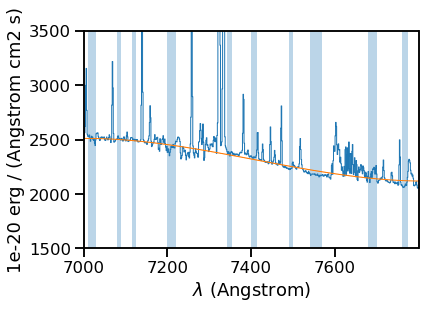

In [148]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[1500, 3500])

In [149]:
yslice, xslice = mboxes["bow shock"].slices
subcube = mcube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube, wav_ranges=wavranges, deg=3, median=False,
)

extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30


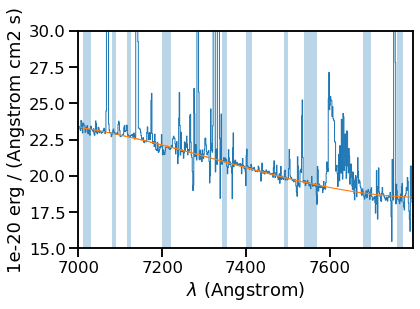

In [152]:
fig, ax = plt.subplots()
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(ylim=[15, 30]);

In [154]:
mcontcube = extract.fit_continuum(
    mcube, wav_ranges=wavranges, deg=3, median=False,
)

extract.fit_continuum: row 0
extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:345: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:346: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:414: RuntimeWarning: invalid value encountered in add
  return off + scl*x


In [155]:
contcube = extract.fit_continuum(
    cube, wav_ranges=wavranges, deg=3, median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1673: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:345: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:346: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:414: RuntimeWarning: invalid value encountered in add
  return off + scl*x


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


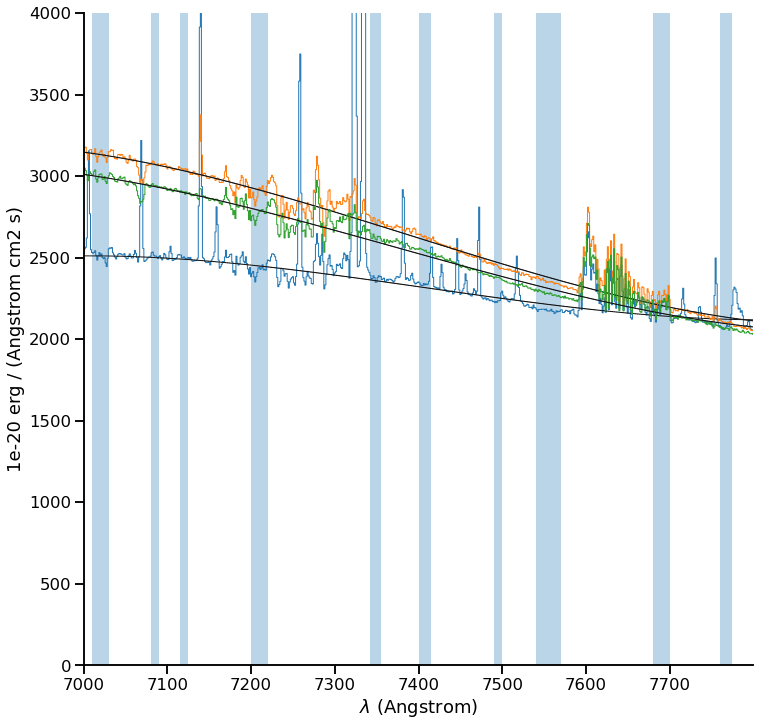

In [156]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in sboxes.values():
    yslice, xslice = box.slices
    spec = cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")
    
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, 4000],
)
sns.despine();

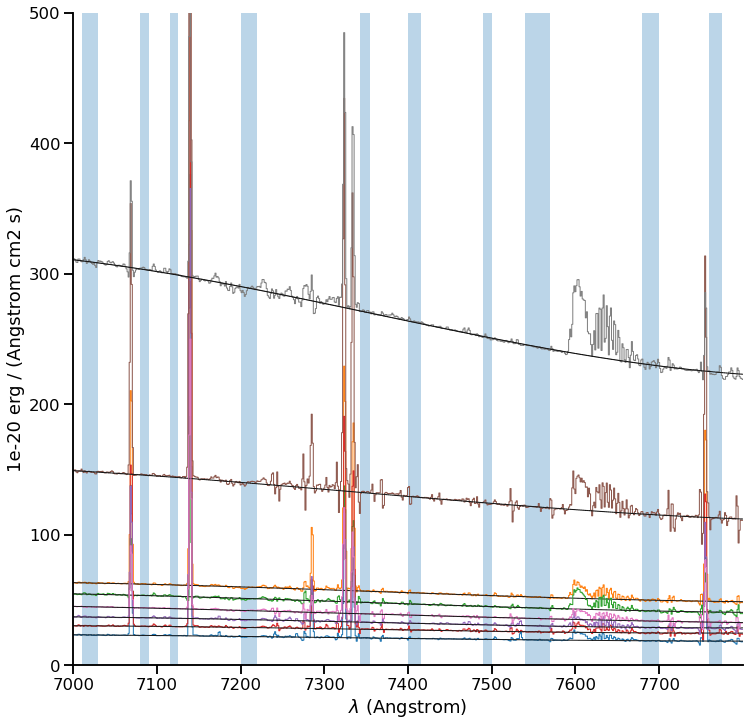

In [157]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in mboxes.values():
    yslice, xslice = box.slices
    spec = mcube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = mcontcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")
    
for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
ax.set(
    ylim=[0, 500],
)
sns.despine();

In [158]:
prefix = f"../big-data/ngc346-sharp-{wavmin:d}-{wavmax:d}-cube"
csubcube = (cube - contcube)
cdivcube = (cube / contcube)
csubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
    )
cdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
    )
contcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
    )

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


In [159]:
prefix = f"../big-data/ngc346-{wavmin:d}-{wavmax:d}-cube"
mcsubcube = (mcube - mcontcube)
mcdivcube = (mcube / mcontcube)
mcsubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
    )
mcdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
    )
mcontcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
    )

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)
